<a href="https://colab.research.google.com/github/MFRoz1/Predict_Budget_on_Freelance_Platform/blob/main/Freelance_Platform_Projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data diambil dari kaggle
link : https://www.kaggle.com/datasets/prtpljdj/freeelance-platform-projects

**DESC** : This dataset pulls the projects posted by clients on PeoplePerHour.
Data collection started on January 20th, 2023, and adds approximately ~40 new projects to this dataset every hour.

Inspiration:

I have been a freelance Python Developer since my graduation (2019). And recently I completed the Google Data Analytics Professional Certificate from Coursera.

Last week I saw this cool video from LUKE BAROUSSE on youtube here's the link. He created a pipeline to scrape Data Analyst jobs in the US on a daily basis and update the dataset daily on Kaggle. Also lately I was not winning a lot of jobs as a freelancer. I have also started looking for a job in Data Analytics. So I thought a lot about it and concluded to do some analysis as it would be a great project to add to my resume.

I hope this dataset proves to be useful to you.

*Permasalahan yang ingin dianalisa*

**Lingkup data analyst**
1. dari negara dan kota mana kebanyakan client berasal
2. Jasa kategori apa yang paling laris
3. Berapa harga jasa tertinggi dari freelance

**Lingkup data scientist**
1. prediksi harga jasa kedepannya


# Import Data

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
# Baca data
df = pd.read_csv("/content/drive/MyDrive/DA & DS/Data dan hasil analisis/Freelance Platform Projects.csv")
df

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Date Posted,Description,Duration,Client Registration Date,Client City,Client Country,Client Currency,Client Job Title
0,Admin assistant needed,Business,Intermediate ($$),Administration Assistance,USD,18.0,remote,ALL,hourly,2023-02-05 05:52:06,We need an admin personnel who can generally ...,NaN,2023-02-05,Los Angeles,United States,USD,NaN
1,ReactJs and React Native Content Writers & Pub...,Writing & Translation,Entry ($),Technical Writing,USD,82.0,remote,ALL,fixed_price,2023-02-05 05:51:25,"We are looking for skilled, web development co...",3 - 4 weeks,2020-10-31,Paris,France,USD,Senior Software Developer
2,Simple Logo,Design,Entry ($),Logo Design,USD,30.0,remote,ALL,fixed_price,2023-02-05 05:50:05,Hello. I'm looking to have a logo created for ...,NaN,2022-07-24,Denver,United States,USD,NaN
3,Video Editing - YouTube Shorts,"Video, Photo & Image",Expert ($$$),Videography,USD,121.0,remote,ALL,fixed_price,2023-02-05 05:49:53,I am looking for an experienced editor to help...,NaN,2021-03-18,Melbourne,Australia,USD,NaN
4,Looking for ghostwriters for short erotica novels,Writing & Translation,Entry ($),Ghost Writing,USD,35.0,remote,ALL,fixed_price,2023-02-05 05:44:27,looking to hire someone to create short storie...,NaN,2022-11-24,New York City,United States,USD,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2178,Published Travel Writer required for content c...,Writing & Translation,Entry ($),Content Writing,GBP,50.0,remote,ALL,fixed_price,2023-01-18 19:23:01,I am looking for a published travel writer to ...,NaN,2011-06-06,Amsterdam,Netherlands,GBP,Wordpress Expert
2179,Shopify - Filtering Work (Product Selection/No...,Design,Intermediate ($$),Web Design,GBP,65.0,remote_country,GB,fixed_price,2023-01-18 19:18:48,On our website www.juicebitz.co.uk we have add...,1 day or less,2022-03-23,Filey,United Kingdom,GBP,Director
2180,Simple SQL Query,Technology & Programming,Entry ($),Data Science & Analysis,GBP,50.0,remote,ALL,fixed_price,2023-01-18 19:18:48,I need someone to write a quick SQL query on a...,NaN,2022-03-14,London,United Kingdom,GBP,NaN
2181,"Create a Carbon, Water, Waste Calculating plat...",Design,Expert ($$$),Web Design,USD,39.0,remote,ALL,hourly,2023-01-18 19:18:47,I am seeking a full stack web developer who sp...,NaN,2013-07-21,Noida,India,USD,"Google Adwords, Pay Per Click, Google Shopping..."


In [65]:
df['Location'].unique()

array(['remote', 'remote_country', 'onsite'], dtype=object)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183 entries, 0 to 2182
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Title                      2183 non-null   object 
 1   Category Name              2183 non-null   object 
 2   Experience                 2183 non-null   object 
 3   Sub Category Name          2183 non-null   object 
 4   Currency                   2183 non-null   object 
 5   Budget                     2183 non-null   float64
 6   Location                   2183 non-null   object 
 7   Freelancer Preferred From  2183 non-null   object 
 8   Type                       2183 non-null   object 
 9   Date Posted                2183 non-null   object 
 10  Description                2183 non-null   object 
 11  Duration                   264 non-null    object 
 12  Client Registration Date   2183 non-null   object 
 13  Client City                2183 non-null   objec

In [67]:
df.describe()

,Budget
count,2183.000000
mean,191.502978
std,665.389068
min,0.000000
25%,30.000000
50%,80.000000
75%,150.000000
max,15000.000000


In [68]:
df.isna().sum()

Title                           0
Category Name                   0
Experience                      0
Sub Category Name               0
Currency                        0
Budget                          0
Location                        0
Freelancer Preferred From       0
Type                            0
Date Posted                     0
Description                     0
Duration                     1919
Client Registration Date        0
Client City                     0
Client Country                  0
Client Currency                 0
Client Job Title             1338
dtype: int64

In [69]:
df.isna().mean()*100

Title                         0.000000
Category Name                 0.000000
Experience                    0.000000
Sub Category Name             0.000000
Currency                      0.000000
Budget                        0.000000
Location                      0.000000
Freelancer Preferred From     0.000000
Type                          0.000000
Date Posted                   0.000000
Description                   0.000000
Duration                     87.906551
Client Registration Date      0.000000
Client City                   0.000000
Client Country                0.000000
Client Currency               0.000000
Client Job Title             61.291800
dtype: float64

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183 entries, 0 to 2182
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Title                      2183 non-null   object 
 1   Category Name              2183 non-null   object 
 2   Experience                 2183 non-null   object 
 3   Sub Category Name          2183 non-null   object 
 4   Currency                   2183 non-null   object 
 5   Budget                     2183 non-null   float64
 6   Location                   2183 non-null   object 
 7   Freelancer Preferred From  2183 non-null   object 
 8   Type                       2183 non-null   object 
 9   Date Posted                2183 non-null   object 
 10  Description                2183 non-null   object 
 11  Duration                   264 non-null    object 
 12  Client Registration Date   2183 non-null   object 
 13  Client City                2183 non-null   objec

In [71]:
#Cek kolom
df.columns

Index(['Title', 'Category Name', 'Experience', 'Sub Category Name', 'Currency',
       'Budget', 'Location', 'Freelancer Preferred From', 'Type',
       'Date Posted', 'Description', 'Duration', 'Client Registration Date',
       'Client City', 'Client Country', 'Client Currency', 'Client Job Title'],
      dtype='object')

# Explore Data

In [72]:
# Drop kolom
df_new = df.drop(columns = ['Date Posted', 'Duration', 'Client Registration Date', 'Client Job Title', 'Description', 'Title'], axis = 1)

In [73]:
df_new['Experience'].value_counts()

Expert ($$$)         962
Entry ($)            925
Intermediate ($$)    296
Name: Experience, dtype: int64

In [74]:
filtered_values = df_new['Sub Category Name'].value_counts()[df_new['Sub Category Name'].value_counts() > 11]
filtered_values

Website Development            234
Graphic Design                 173
Web Design                     129
Logo Design                    116
Programming & Coding           112
Administration Assistance       80
Translation                     62
Finance & Accounting            59
Image Editing                   57
3D Design                       55
Content Writing                 54
Illustration & Drawing          51
Sales & Calls                   46
Mobile App Development          46
Videography                     45
SEO                             38
Databases                       36
Data Science & Analysis         35
Voice-Over                      34
Legal Services                  33
Computer-Aided Design (CAD)     32
Consulting                      29
Interior/Exterior Design        27
Filmmaking                      26
Fashion & Clothing              25
Copywriting                     24
eCommerce CMS Development       22
Business Writing                20
Animation           

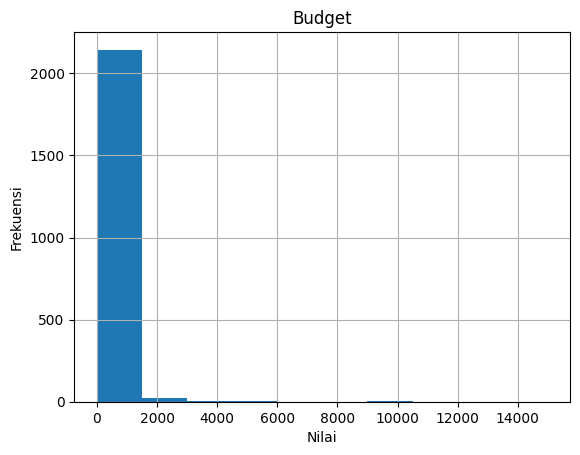

In [75]:
plt.hist(df_new['Budget'])

# Opsional: Menentukan jumlah bin secara eksplisit
# plt.hist(data, bins=5)

plt.title('Budget')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.grid(True)

plt.show()

In [76]:
kat_exp = df_new.groupby(['Category Name', 'Experience'])
kat_exp.first()

Sub Category Name  \
Category Name               Experience                                     
Business                    Entry ($)          Administration Assistance   
                            Expert ($$$)        Management & Development   
                            Intermediate ($$)  Administration Assistance   
Design                      Entry ($)                        Logo Design   
                            Expert ($$$)                      Web Design   
                            Intermediate ($$)                 Web Design   
Digital Marketing           Entry ($)            Conversion Optimization   
                            Expert ($$$)             eCommerce Marketing   
                            Intermediate ($$)        eCommerce Marketing   
Marketing, Branding & Sales Entry ($)                      Sales & Calls   
                            Expert ($$$)                Direct Marketing   
                            Intermediate ($$)              Sales & Calls   
Music & Audio               Entry ($)                            Podcast   
                            Expert ($$$)                         Podcast   
                            Intermediate ($$)                 Voice-Over   
Social Media                Entry ($)                 Facebook Marketing   
                            Expert ($$$)             Instagram Marketing   
                            Intermediate ($$)        Instagram Marketing   
Technology & Programming    Entry ($)               Programming & Coding   
                            Expert ($$$)            Programming & Coding   
                            Intermediate ($$)       Programming & Coding   
Video, Photo & Image        Entry ($)                         Filmmaking   
                            Expert ($$$)                     Videography   
                            Intermediate ($$)              Image Editing   
Writing & Translation       Entry ($)                  Technical Writing   
                            Expert ($$$)                    Proofreading   
                            Intermediate ($$)                Translation   

                                              Currency  Budget  \
Category Name               Experience                           
Business                    Entry ($)              USD    20.0   
                            Expert ($$$)           GBP   194.0   
                            Intermediate ($$)      USD    18.0   
Design                      Entry ($)              USD    30.0   
                            Expert ($$$)           GBP   150.0   
                            Intermediate ($$)      EUR    73.0   
Digital Marketing           Entry ($)              EUR    30.0   
                            Expert ($$$)           GBP   105.0   
                            Intermediate ($$)      USD   100.0   
Marketing, Branding & Sales Entry ($)              EUR    50.0   
                            Expert ($$$)           GBP   132.0   
                            Intermediate ($$)      GBP    20.0   
Music & Audio               Entry ($)              GBP    70.0   
                            Expert ($$$)           GBP    99.0   
                            Intermediate ($$)      USD   100.0   
Social Media                Entry ($)              GBP    65.0   
                            Expert ($$$)           EUR   136.0   
                            Intermediate ($$)      USD    50.0   
Technology & Programming    Entry ($)              USD    50.0   
                            Expert ($$$)           GBP   363.0   
                            Intermediate ($$)      USD   300.0   
Video, Photo & Image        Entry ($)              GBP    20.0   
                            Expert ($$$)           USD   121.0   
                            Intermediate ($$)      GBP    70.0   
Writing & Translation       Entry ($)              USD    82.0   
                            Expert ($$$)           USD   250.0   
  

# Data Preparation


## Pembagian 2 data berdasarkan tipe payment

In [77]:
fixed_price = df_new[df_new['Type'] == 'fixed_price']
fixed_price

,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Client City,Client Country,Client Currency
1,Writing & Translation,Entry ($),Technical Writing,USD,82.0,remote,ALL,fixed_price,Paris,France,USD
2,Design,Entry ($),Logo Design,USD,30.0,remote,ALL,fixed_price,Denver,United States,USD
3,"Video, Photo & Image",Expert ($$$),Videography,USD,121.0,remote,ALL,fixed_price,Melbourne,Australia,USD
4,Writing & Translation,Entry ($),Ghost Writing,USD,35.0,remote,ALL,fixed_price,New York City,United States,USD
5,Technology & Programming,Intermediate ($$),Programming & Coding,USD,300.0,remote,ALL,fixed_price,Toronto,Canada,USD
...,...,...,...,...,...,...,...,...,...,...,...
2177,Technology & Programming,Entry ($),Databases,GBP,30.0,remote,ALL,fixed_price,London,United Kingdom,GBP
2178,Writing & Translation,Entry ($),Content Writing,GBP,50.0,remote,ALL,fixed_price,Amsterdam,Netherlands,GBP
2179,Design,Intermediate ($$),Web Design,GBP,65.0,remote_country,GB,fixed_price,Filey,United Kingdom,GBP
2180,Technology & Programming,Entry ($),Data Science & Analysis,GBP,50.0,remote,ALL,fixed_price,London,United Kingdom,GBP


In [78]:
hourly = df_new[df_new['Type'] == 'hourly']
hourly

,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Client City,Client Country,Client Currency
0,Business,Intermediate ($$),Administration Assistance,USD,18.0,remote,ALL,hourly,Los Angeles,United States,USD
17,Technology & Programming,Entry ($),Website Development,GBP,13.0,remote,ALL,hourly,London,United Kingdom,GBP
18,Technology & Programming,Expert ($$$),Data Science & Analysis,USD,31.0,remote,ALL,hourly,Southaven,United States,USD
31,Technology & Programming,Expert ($$$),Data Science & Analysis,USD,31.0,remote,ALL,hourly,Amsterdam,Netherlands,EUR
48,Design,Expert ($$$),Web Design,GBP,32.0,remote,ALL,hourly,Tokyo,Japan,USD
...,...,...,...,...,...,...,...,...,...,...,...
2158,Business,Entry ($),Administration Assistance,GBP,10.0,remote,ALL,hourly,Tredegar,United Kingdom,GBP
2164,Technology & Programming,Expert ($$$),Website Development,EUR,37.0,remote,ALL,hourly,Frankfurt am Main,Germany,EUR
2170,"Marketing, Branding & Sales",Expert ($$$),Sales & Calls,GBP,25.0,remote,ALL,hourly,Cambridge,United Kingdom,GBP
2173,Technology & Programming,Entry ($),Website Development,GBP,18.0,remote,ALL,hourly,Cheltenham,United Kingdom,GBP


## Handling Outlier

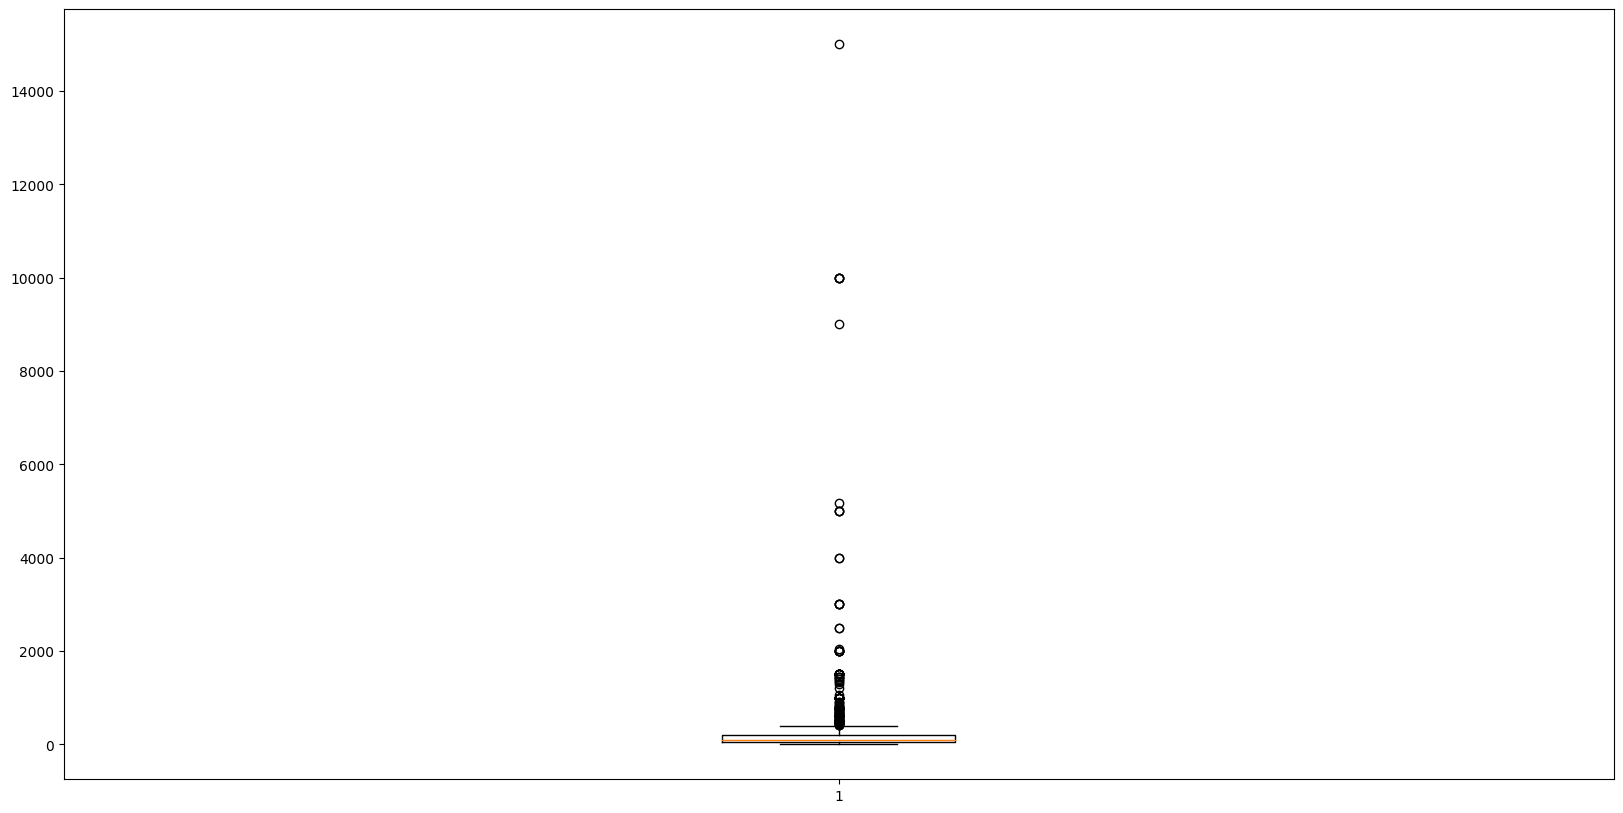

In [79]:
# Data Fixed_price
plt.figure(figsize=(20,10))
plt.boxplot(fixed_price["Budget"])
plt.show()

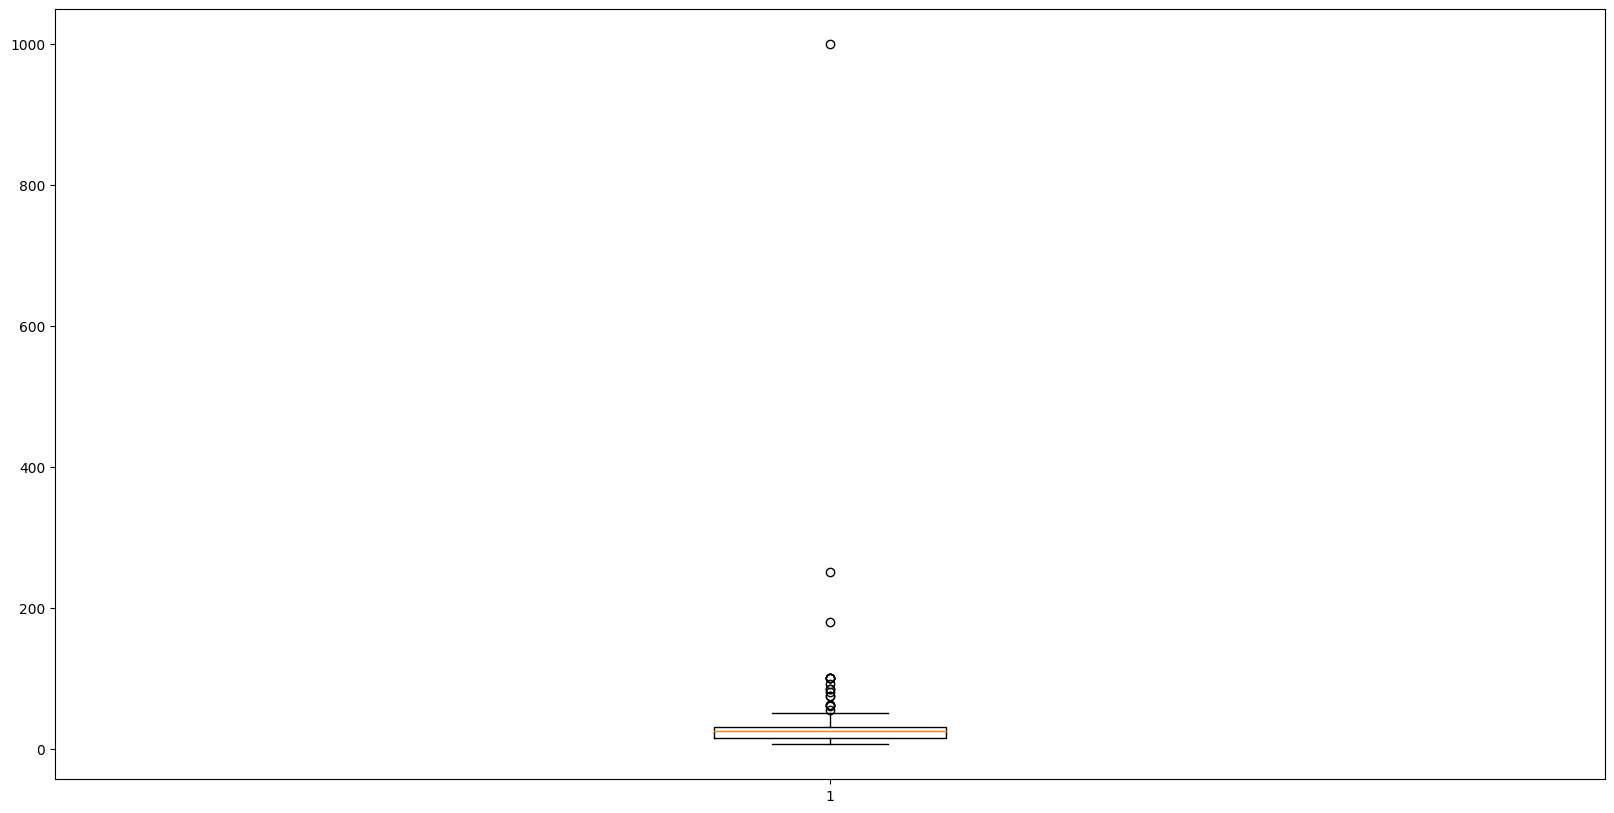

In [80]:
# Data Fixed_price
plt.figure(figsize=(20,10))
plt.boxplot(hourly["Budget"])
plt.show()

Karena terdeteksi banyak outlier pada data, perlu dibersihkan terlebih dahulu

In [81]:
#Clipping menggunakan Boxplot
Q1 = fixed_price['Budget'].quantile(0.25)
Q3 = fixed_price['Budget'].quantile(0.75)
IQR = Q3 - Q1
Uwishker = Q3 + 1.5 * IQR
Lwishker = Q1 + 1.5 * IQR
fixed_price['Budget'] = fixed_price['Budget'].clip(Lwishker, Uwishker)

<ipython-input-81-abc5db8ad4ef>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed_price['Budget'] = fixed_price['Budget'].clip(Lwishker, Uwishker)


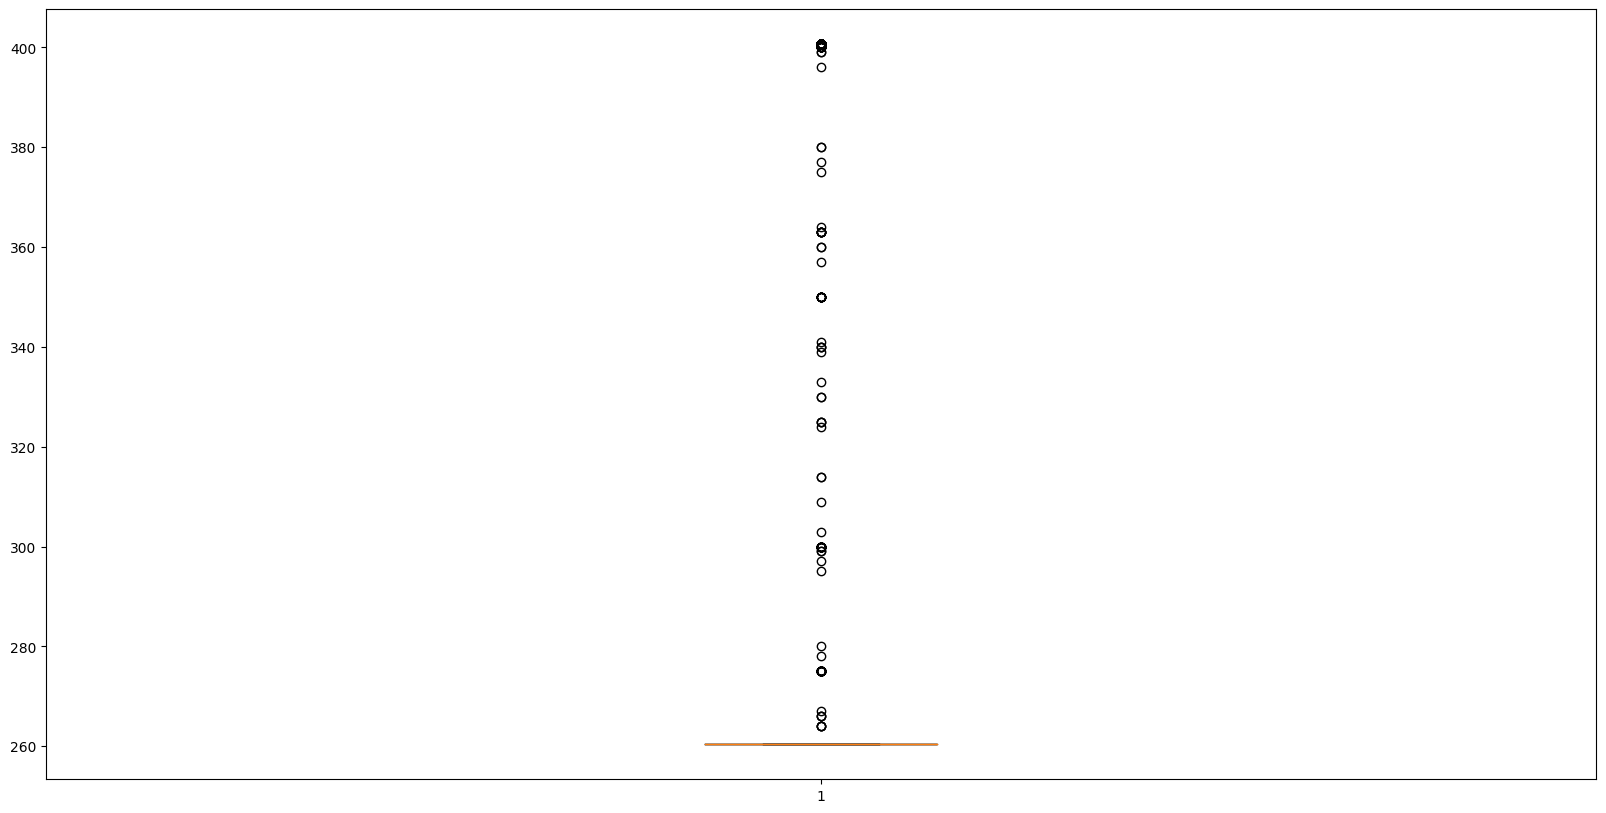

In [82]:
plt.figure(figsize=(20,10))
plt.boxplot(fixed_price["Budget"])
plt.show()

In [83]:
#Clipping menggunakan Boxplot
Q1 = hourly['Budget'].quantile(0.25)
Q3 = hourly['Budget'].quantile(0.75)
IQR = Q3 - Q1
Uwishker = Q3 + 1.5 * IQR
Lwishker = Q1 + 1.5 * IQR
hourly['Budget'] = hourly['Budget'].clip(Lwishker, Uwishker)

<ipython-input-83-79ca32336252>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hourly['Budget'] = hourly['Budget'].clip(Lwishker, Uwishker)


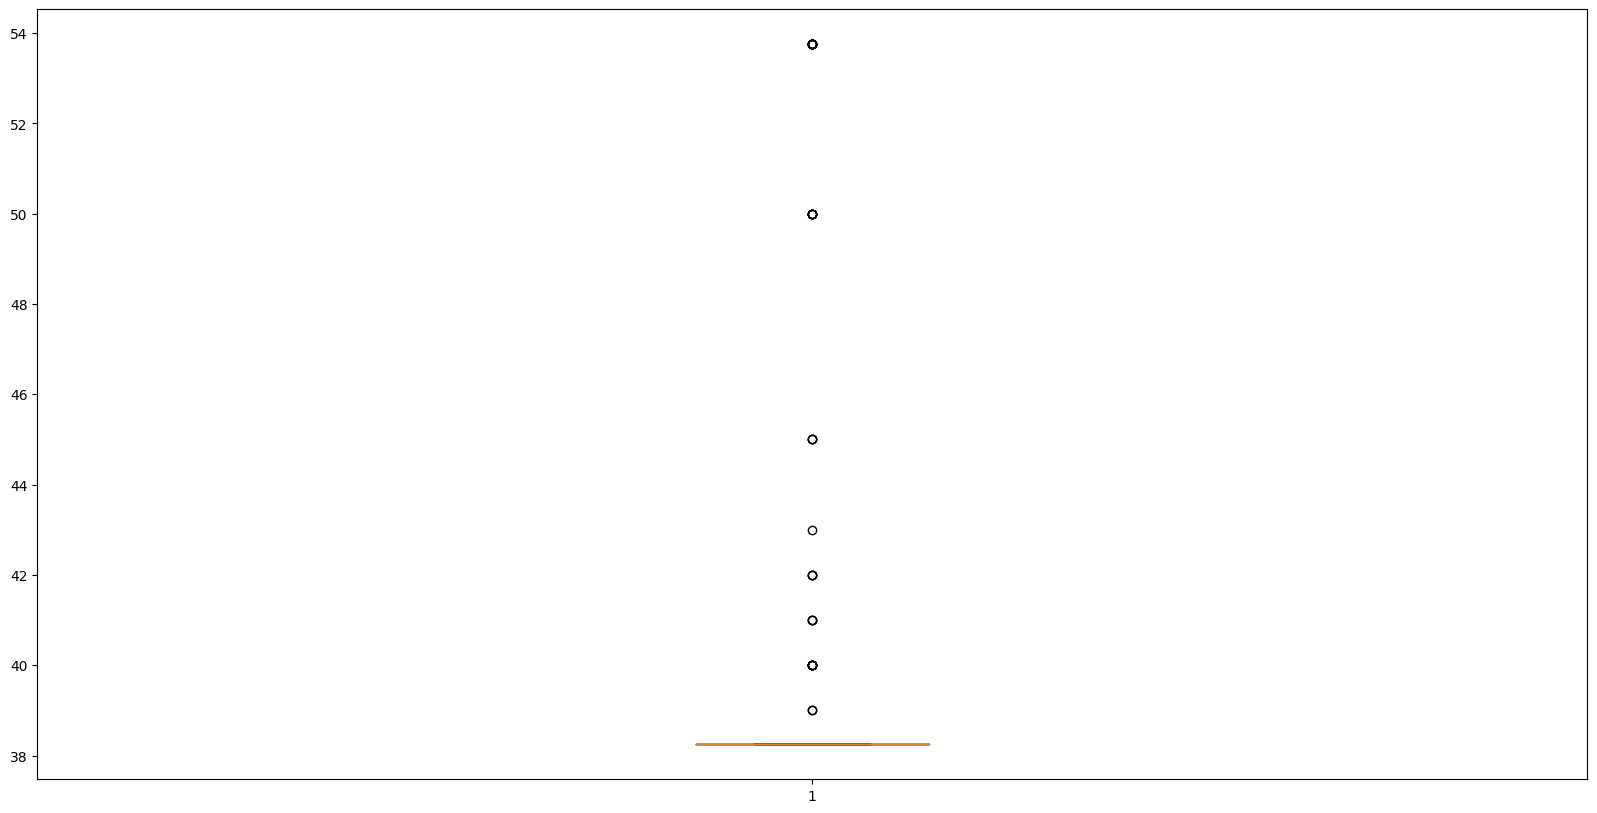

In [84]:
plt.figure(figsize = (20,10))
plt.boxplot(hourly["Budget"])
plt.show()

## Handling Duplikat Value

Tidak bisa dilakukan pengecekan nilai duplikat karena tidak terdapat kolom yang bisa menjadi primary key

## Encoding

**Encoding fixed_price**

In [85]:
fixed_price.columns

Index(['Category Name', 'Experience', 'Sub Category Name', 'Currency',
       'Budget', 'Location', 'Freelancer Preferred From', 'Type',
       'Client City', 'Client Country', 'Client Currency'],
      dtype='object')

In [86]:
#Mendefinisikan nilai unique dari masing masing kolom yang akan di encodimg
col = sorted(fixed_price['Category Name'].unique().tolist()) + sorted(fixed_price['Experience'].unique().tolist()) + sorted(fixed_price['Sub Category Name'].unique().tolist()) + sorted(fixed_price['Currency'].unique().tolist())+ sorted(fixed_price['Location'].unique().tolist()) + sorted(fixed_price['Type'].unique().tolist()) + sorted(fixed_price['Client Country'].unique().tolist())
print(col)

['Business', 'Design', 'Digital Marketing', 'Marketing, Branding & Sales', 'Music & Audio', 'Social Media', 'Technology & Programming', 'Video, Photo & Image', 'Writing & Translation', 'Entry ($)', 'Expert ($$$)', 'Intermediate ($$)', '3D Design', 'Administration Assistance', 'Adsense', 'Affiliate Marketing', 'Animation', 'Audio & Sound Editing', 'Audio & Sound Engineering', 'Audio & Sound Mixing', 'Audio & Sound Recording', 'Audiobook', 'BREXIT Consulting', 'Books & Magazines', 'Branding', 'Business Writing', 'CMS Development', 'Cards & Stationery', 'Cartoon & Comics', 'Community Management', 'Computer-Aided Design (CAD)', 'Consulting', 'Content Marketing', 'Content Writing', 'Conversion Optimization', 'Copywriting', 'Creative Writing', 'Data Science & Analysis', 'Databases', 'Direct Marketing', 'ERP/CRM Development', 'Email Marketing', 'Email Template Development', 'Events Management', 'Exhibition Marketing', 'Experimental Marketing', 'Facebook Marketing', 'Fashion & Clothing', 'Film

In [87]:
# Mengubah kolom menggunakan OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore')
encod = pd.DataFrame(ohe.fit_transform(fixed_price[['Category Name', 'Experience', 'Sub Category Name', 'Currency','Location', 'Type', 'Client Country']]).toarray(), columns = col)
encod

,Business,Design,Digital Marketing,"Marketing, Branding & Sales",Music & Audio,Social Media,Technology & Programming,"Video, Photo & Image",Writing & Translation,Entry ($),...,Turkey,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uzbekistan,Venezuela,Viet Nam,Zimbabwe
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1869,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1870,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


**Encoding Hourly**

In [88]:
#Mendefinisikan nilai unique dari masing masing kolom yang akan di encodimg
col2 = sorted(hourly['Category Name'].unique().tolist()) + sorted(hourly['Experience'].unique().tolist()) + sorted(hourly['Sub Category Name'].unique().tolist()) + sorted(hourly['Currency'].unique().tolist())+ sorted(hourly['Location'].unique().tolist()) + sorted(hourly['Type'].unique().tolist()) + sorted(hourly['Client Country'].unique().tolist())
print(col2)

['Business', 'Design', 'Digital Marketing', 'Marketing, Branding & Sales', 'Music & Audio', 'Social Media', 'Technology & Programming', 'Video, Photo & Image', 'Writing & Translation', 'Entry ($)', 'Expert ($$$)', 'Intermediate ($$)', '3D Design', 'Administration Assistance', 'Animation', 'Audio & Sound Editing', 'Books & Magazines', 'Branding', 'Business Writing', 'CMS Development', 'Cards & Stationery', 'Cartoon & Comics', 'Community Management', 'Computer-Aided Design (CAD)', 'Consulting', 'Content Marketing', 'Content Writing', 'Copywriting', 'Creative Writing', 'Data Science & Analysis', 'Databases', 'Direct Marketing', 'ERP/CRM Development', 'Email Marketing', 'Email Template Development', 'Events Management', 'Facebook Marketing', 'Fashion & Clothing', 'Filmmaking', 'Finance & Accounting', 'Ghost Writing', 'Graphic Design', 'Growth Hacking', 'Illustration & Drawing', 'Image Editing', 'Influencer Marketing', 'Instagram Marketing', 'Interior/Exterior Design', 'Legal Services', 'Li

In [89]:
# Mengubah kolom menggunakan OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
ohe2 = OneHotEncoder(handle_unknown = 'ignore')
encod2 = pd.DataFrame(ohe2.fit_transform(hourly[['Category Name', 'Experience', 'Sub Category Name', 'Currency','Location', 'Type', 'Client Country']]).toarray(), columns = col2)
encod2

,Business,Design,Digital Marketing,"Marketing, Branding & Sales",Music & Audio,Social Media,Technology & Programming,"Video, Photo & Image",Writing & Translation,Entry ($),...,South Africa,Spain,Sweden,Switzerland,Turkey,Uganda,United Arab Emirates,United Kingdom,United States,Viet Nam
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
307,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
308,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
309,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Pre Modelling

## Fixed_price

In [90]:
fixed_price = fixed_price.reset_index()

In [91]:
final_fixed_price = fixed_price.join(encod)
final_fixed_price

,index,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Client City,...,Turkey,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uzbekistan,Venezuela,Viet Nam,Zimbabwe
0,1,Writing & Translation,Entry ($),Technical Writing,USD,260.375,remote,ALL,fixed_price,Paris,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Design,Entry ($),Logo Design,USD,260.375,remote,ALL,fixed_price,Denver,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,"Video, Photo & Image",Expert ($$$),Videography,USD,260.375,remote,ALL,fixed_price,Melbourne,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Writing & Translation,Entry ($),Ghost Writing,USD,260.375,remote,ALL,fixed_price,New York City,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,Technology & Programming,Intermediate ($$),Programming & Coding,USD,300.000,remote,ALL,fixed_price,Toronto,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,2177,Technology & Programming,Entry ($),Databases,GBP,260.375,remote,ALL,fixed_price,London,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1868,2178,Writing & Translation,Entry ($),Content Writing,GBP,260.375,remote,ALL,fixed_price,Amsterdam,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1869,2179,Design,Intermediate ($$),Web Design,GBP,260.375,remote_country,GB,fixed_price,Filey,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1870,2180,Technology & Programming,Entry ($),Data Science & Analysis,GBP,260.375,remote,ALL,fixed_price,London,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [92]:
ffinal_fixed_price = final_fixed_price.drop(columns = ['Category Name', 'Experience', 'Sub Category Name', 'Currency','Location', 'Freelancer Preferred From', 'Type','Client City', 'Client Country', 'Client Currency'], axis = 1)

In [93]:
ffinal_fixed_price

,index,Budget,Business,Design,Digital Marketing,"Marketing, Branding & Sales",Music & Audio,Social Media,Technology & Programming,"Video, Photo & Image",...,Turkey,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uzbekistan,Venezuela,Viet Nam,Zimbabwe
0,1,260.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,260.375,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,260.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,260.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,300.000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,2177,260.375,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1868,2178,260.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1869,2179,260.375,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1870,2180,260.375,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [94]:
ffinal_fixed_price = ffinal_fixed_price.drop(columns = ['index'])

## Hourly

In [95]:
hourly = hourly.reset_index()

In [96]:
final_hourly = hourly.join(encod2)
final_hourly

,index,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Client City,...,South Africa,Spain,Sweden,Switzerland,Turkey,Uganda,United Arab Emirates,United Kingdom,United States,Viet Nam
0,0,Business,Intermediate ($$),Administration Assistance,USD,38.25,remote,ALL,hourly,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,17,Technology & Programming,Entry ($),Website Development,GBP,38.25,remote,ALL,hourly,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,18,Technology & Programming,Expert ($$$),Data Science & Analysis,USD,38.25,remote,ALL,hourly,Southaven,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,31,Technology & Programming,Expert ($$$),Data Science & Analysis,USD,38.25,remote,ALL,hourly,Amsterdam,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,48,Design,Expert ($$$),Web Design,GBP,38.25,remote,ALL,hourly,Tokyo,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,2158,Business,Entry ($),Administration Assistance,GBP,38.25,remote,ALL,hourly,Tredegar,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
307,2164,Technology & Programming,Expert ($$$),Website Development,EUR,38.25,remote,ALL,hourly,Frankfurt am Main,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
308,2170,"Marketing, Branding & Sales",Expert ($$$),Sales & Calls,GBP,38.25,remote,ALL,hourly,Cambridge,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
309,2173,Technology & Programming,Entry ($),Website Development,GBP,38.25,remote,ALL,hourly,Cheltenham,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [97]:
ffinal_hourly = final_hourly.drop(columns = ['Category Name', 'Experience', 'Sub Category Name', 'Currency','Location', 'Freelancer Preferred From', 'Type','Client City', 'Client Country', 'Client Currency'], axis = 1)

In [98]:
ffinal_hourly

,index,Budget,Business,Design,Digital Marketing,"Marketing, Branding & Sales",Music & Audio,Social Media,Technology & Programming,"Video, Photo & Image",...,South Africa,Spain,Sweden,Switzerland,Turkey,Uganda,United Arab Emirates,United Kingdom,United States,Viet Nam
0,0,38.25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,17,38.25,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,18,38.25,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,31,38.25,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,48,38.25,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,2158,38.25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
307,2164,38.25,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
308,2170,38.25,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
309,2173,38.25,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [99]:
ffinal_hourly = ffinal_hourly.drop(columns = ['index'])

In [100]:
ffinal_hourly.columns

Index(['Budget', 'Business', 'Design', 'Digital Marketing',
       'Marketing, Branding & Sales', 'Music & Audio', 'Social Media',
       'Technology & Programming', 'Video, Photo & Image',
       'Writing & Translation',
       ...
       'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Uganda',
       'United Arab Emirates', 'United Kingdom', 'United States', 'Viet Nam'],
      dtype='object', length=120)

# Modelling

## Fixed Price

In [101]:
X1 = ffinal_fixed_price.drop(columns = ['Budget'])
y1 = ffinal_fixed_price['Budget']

In [102]:
X1.shape

(1872, 201)

In [103]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size = 0.2, random_state = 3)

In [104]:
duplicates = ffinal_fixed_price.columns[ffinal_fixed_price.columns.duplicated()]
print("Kolom dengan nama duplikat:", duplicates)

Kolom dengan nama duplikat: Index([], dtype='object')


### Random Forest Regressor

In [105]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
RFR = RandomForestRegressor(n_estimators = 10, random_state = 3)
RFR.fit(X1_train, y1_train)

# Memprediksi data uji
y1_pred = RFR.predict(X1_test)

# Menghitung error (misalnya, MSE)
mse = mean_squared_error(y1_test, y1_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 957.6668716377517


### xgb

In [106]:
# Impor pustaka
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Membuat model XGBoost Regressor
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05, random_state=42)

# Melatih model
xgb_model.fit(X1_train, y1_train)

# Memprediksi data uji
y1_pred = xgb_model.predict(X1_test)

# Menghitung error (misalnya, MSE)
mse = mean_squared_error(y1_test, y1_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 950.321541284802


### Neural Network

In [107]:
import tensorflow as tf
from sklearn.metrics import accuracy_score

# Membangun model neural network menggunakan TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4096, activation='relu', input_shape=(201,)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Melatih model
model.fit(X1_train, y1_train, epochs=10, batch_size=32, validation_split=0.2)

# Melakukan prediksi pada data uji
y1_pred_nn = model.predict(X1_test)
y1_pred_nn = (y1_pred_nn > 0.5).astype(int)

# Mengukur akurasi model
mse = mean_squared_error(y1_test, y1_pred_nn)
print(f"Mean Squared Error: {mse}")

Epoch 1/10
38/38 [==============================] - 5s 99ms/step - loss: -67864.1094 - accuracy: 0.0000e+00 - val_loss: -293082.4688 - val_accuracy: 0.0000e+00
Epoch 2/10
38/38 [==============================] - 3s 69ms/step - loss: -1252805.8750 - accuracy: 0.0000e+00 - val_loss: -3027163.0000 - val_accuracy: 0.0000e+00
Epoch 3/10
38/38 [==============================] - 3s 68ms/step - loss: -6961554.0000 - accuracy: 0.0000e+00 - val_loss: -12722940.0000 - val_accuracy: 0.0000e+00
Epoch 4/10
38/38 [==============================] - 2s 44ms/step - loss: -22521104.0000 - accuracy: 0.0000e+00 - val_loss: -35079596.0000 - val_accuracy: 0.0000e+00
Epoch 5/10
38/38 [==============================] - 2s 43ms/step - loss: -53873084.0000 - accuracy: 0.0000e+00 - val_loss: -76129936.0000 - val_accuracy: 0.0000e+00
Epoch 6/10
38/38 [==============================] - 2s 48ms/step - loss: -107059760.0000 - accuracy: 0.0000e+00 - val_loss: -141593008.0000 - val_accuracy: 0.0000e+00
Epoch 7/10
38/38

### Linear Regression

In [108]:
from sklearn.linear_model import LinearRegression
# Membuat model regresi linear
model1 = LinearRegression()

# Melatih model
model1.fit(X1_train, y1_train)

# Memprediksi data uji
y1_pred_lr = model1.predict(X1_test)

# Menghitung error (misalnya, MSE)
mse = mean_squared_error(y1_test, y1_pred_lr)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 5.160561999970427e+27


## Hourly

In [109]:
X2 = ffinal_hourly.drop(columns = ['Budget'])
y2 = ffinal_hourly['Budget']

In [110]:
X2.shape

(311, 119)

In [111]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size = 0.2, random_state = 3)

In [112]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
RFR = RandomForestRegressor(n_estimators = 10, random_state = 3)
RFR.fit(X2_train, y2_train)

# Memprediksi data uji
y2_pred = RFR.predict(X2_test)

# Menghitung error (misalnya, MSE)
mse = mean_squared_error(y2_test, y2_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 13.745661296035808


In [113]:
# Impor pustaka
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Membuat model XGBoost Regressor
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05, random_state=42)

# Melatih model
xgb_model.fit(X2_train, y2_train)

# Memprediksi data uji
y2_pred = xgb_model.predict(X2_test)

# Menghitung error (misalnya, MSE)
mse = mean_squared_error(y2_test, y2_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 12.325639111279983


In [114]:
import tensorflow as tf
from sklearn.metrics import accuracy_score

# Membangun model neural network menggunakan TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4096, activation='relu', input_shape=(119,)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Melatih model
model.fit(X2_train, y2_train, epochs=10, batch_size=32, validation_split=0.2)

# Melakukan prediksi pada data uji
y2_pred_nn = model.predict(X2_test)
y2_pred_nn = (y2_pred_nn > 0.5).astype(int)

# Mengukur akurasi model
mse = mean_squared_error(y2_test, y2_pred_nn)
print(f"Mean Squared Error: {mse}")

Epoch 1/10
7/7 [==============================] - 1s 78ms/step - loss: -182.0998 - accuracy: 0.0000e+00 - val_loss: -686.7583 - val_accuracy: 0.0000e+00
Epoch 2/10
7/7 [==============================] - 0s 43ms/step - loss: -1315.7498 - accuracy: 0.0000e+00 - val_loss: -2882.4988 - val_accuracy: 0.0000e+00
Epoch 3/10
7/7 [==============================] - 0s 44ms/step - loss: -4483.6870 - accuracy: 0.0000e+00 - val_loss: -8094.2114 - val_accuracy: 0.0000e+00
Epoch 4/10
7/7 [==============================] - 0s 46ms/step - loss: -11372.9639 - accuracy: 0.0000e+00 - val_loss: -18305.4883 - val_accuracy: 0.0000e+00
Epoch 5/10
7/7 [==============================] - 0s 45ms/step - loss: -24164.4375 - accuracy: 0.0000e+00 - val_loss: -35951.7891 - val_accuracy: 0.0000e+00
Epoch 6/10
7/7 [==============================] - 0s 45ms/step - loss: -45235.9688 - accuracy: 0.0000e+00 - val_loss: -63997.7305 - val_accuracy: 0.0000e+00
Epoch 7/10
7/7 [==============================] - 0s 43ms/step - l

In [115]:
from sklearn.linear_model import LinearRegression
# Membuat model regresi linear
model2 = LinearRegression()

# Melatih model
model2.fit(X2_train, y2_train)

# Memprediksi data uji
y2_pred_lr = model2.predict(X2_test)

# Menghitung error (misalnya, MSE)
mse = mean_squared_error(y2_test, y2_pred_lr)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.3315574974669372e+24


# Result and Conclussion

Saya sengaja membedakan pengolahan antara kolom "Budget" yang pembayarannya fixed price dan per jam atau houry untuk mengoptimalkan model.

Didapatkan model paling optimal yaitu menggunakan linear regression, baik pada data fixed_price maupun hourly

**Hasil Prediksi untuk fixed_price**

In [121]:
# Mendapatkan koefisien (slope) dari persamaan regresi
slope_fixed_price = model1.coef_
print("Hasil slope dari fixed_price :", slope_fixed_price)

# Mendapatkan intersep dari persamaan regresi
intercept_fixed_price = model1.intercept_
print("Hasil intersept dari fixed_price :", intercept_fixed_price)

Hasil slope dari fixed_price : [ 4.38552065e+13 -1.47417262e+15 -1.83873656e+15 -1.83216890e+15
 -2.34041205e+15 -1.58570434e+15 -1.62589002e+15 -1.07332866e+15
 -2.83485631e+15  5.08667894e+14  5.08667894e+14  5.08667894e+14
 -1.98611936e+14 -1.71663976e+15  1.65952001e+14  1.65952001e+14
 -1.98611936e+14  6.67627493e+14  6.67627493e+14 -6.76327186e+14
  6.67627493e+14  6.67627493e+14 -1.71663976e+15 -1.98611936e+14
  1.59384348e+14  1.16207175e+15 -4.68945339e+13 -1.98611936e+14
 -1.98611936e+14 -8.70802153e+13 -1.98611936e+14 -1.71663976e+15
  1.65952001e+14  1.16207175e+15  1.65952001e+14  1.16207175e+15
  1.16207175e+15 -4.68945339e+13 -4.68945339e+13  1.59384348e+14
 -4.68945339e+13  1.65952001e+14 -4.68945339e+13  1.59384348e+14
  1.59384348e+14  1.59384348e+14 -8.70802153e+13 -1.98611936e+14
 -5.99455896e+14 -1.71663976e+15 -1.98611936e+14  1.59384348e+14
 -4.68945339e+13  1.16207175e+15 -1.98611936e+14  1.65952001e+14
 -1.98611936e+14 -5.99455896e+14  1.65952001e+14 -8.7080215

In [123]:
model1.fit(X1, y1)

LinearRegression()

In [132]:
y_pred_all_fixed_price = model1.predict(X1)
mse = mean_squared_error(y1, y_pred_all_fixed_price)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1095.8309879139956


In [126]:
fixed_price['Budget_prediction'] = y_pred_all_fixed_price

In [127]:
fixed_price

,index,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Client City,Client Country,Client Currency,Budget_prediction
0,1,Writing & Translation,Entry ($),Technical Writing,USD,260.375,remote,ALL,fixed_price,Paris,France,USD,281.078125
1,2,Design,Entry ($),Logo Design,USD,260.375,remote,ALL,fixed_price,Denver,United States,USD,245.078125
2,3,"Video, Photo & Image",Expert ($$$),Videography,USD,260.375,remote,ALL,fixed_price,Melbourne,Australia,USD,290.890625
3,4,Writing & Translation,Entry ($),Ghost Writing,USD,260.375,remote,ALL,fixed_price,New York City,United States,USD,284.234375
4,5,Technology & Programming,Intermediate ($$),Programming & Coding,USD,300.000,remote,ALL,fixed_price,Toronto,Canada,USD,296.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,2177,Technology & Programming,Entry ($),Databases,GBP,260.375,remote,ALL,fixed_price,London,United Kingdom,GBP,279.718750
1868,2178,Writing & Translation,Entry ($),Content Writing,GBP,260.375,remote,ALL,fixed_price,Amsterdam,Netherlands,GBP,257.484375
1869,2179,Design,Intermediate ($$),Web Design,GBP,260.375,remote_country,GB,fixed_price,Filey,United Kingdom,GBP,271.500000
1870,2180,Technology & Programming,Entry ($),Data Science & Analysis,GBP,260.375,remote,ALL,fixed_price,London,United Kingdom,GBP,281.781250


**Hasil Prediksi untuk Hourly**

In [122]:
# Mendapatkan koefisien (slope) dari persamaan regresi
slope_hourly = model2.coef_
print("Hasil slope dari hourly :", slope_hourly)

# Mendapatkan intersep dari persamaan regresi
intercept_hourly = model2.intercept_
print("Hasil intersep dari hourly :", intercept_hourly)

Hasil slope dari hourly : [-4.03297472e+10 -8.96437135e+12 -2.38945267e+12 -1.16660500e+13
 -6.70206225e+12 -6.59847509e+12 -1.16735520e+13 -6.31525181e+12
 -1.99411128e+13 -4.66374893e+12 -4.66374893e+12 -4.66374893e+12
  1.15478172e+12 -7.76925988e+12  1.15478172e+12 -1.10752738e+12
  1.15478172e+12  3.85646033e+12  1.21315232e+13  3.86396236e+12
 -3.92254847e+12  2.05515288e+12 -1.21111453e+12  1.15478172e+12
 -7.76925988e+12 -5.42013696e+12  1.21315232e+13  1.21315232e+13
  1.21315232e+13  3.86396236e+12  3.86396236e+12  3.85646033e+12
  3.86396236e+12 -5.42013696e+12  3.86396236e+12  3.85646033e+12
 -1.21111453e+12  1.15478172e+12 -1.49433781e+12 -7.76925988e+12
  1.21315232e+13  1.15478172e+12 -5.42013696e+12  1.15478172e+12
 -1.49433781e+12 -5.42013696e+12 -1.21111453e+12  1.15478172e+12
 -7.76925988e+12  1.82904320e+12  1.15478172e+12 -7.76925988e+12
  3.86396236e+12 -5.42013696e+12  7.74968128e+11 -1.49433781e+12
  3.86396236e+12  3.85646033e+12  1.21315232e+13  1.21315232e+13

In [128]:
model2.fit(X2,y2)

LinearRegression()

In [129]:
y_pred_all_hourly = model2.predict(X2)

In [133]:
mse = mean_squared_error(y2, y_pred_all_hourly)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 10.455044126203973


In [134]:
hourly['Budget_prediction'] = y_pred_all_hourly

In [135]:
hourly

,index,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Client City,Client Country,Client Currency,Budget_prediction
0,0,Business,Intermediate ($$),Administration Assistance,USD,38.25,remote,ALL,hourly,Los Angeles,United States,USD,41.680664
1,17,Technology & Programming,Entry ($),Website Development,GBP,38.25,remote,ALL,hourly,London,United Kingdom,GBP,37.950195
2,18,Technology & Programming,Expert ($$$),Data Science & Analysis,USD,38.25,remote,ALL,hourly,Southaven,United States,USD,40.937500
3,31,Technology & Programming,Expert ($$$),Data Science & Analysis,USD,38.25,remote,ALL,hourly,Amsterdam,Netherlands,EUR,39.739258
4,48,Design,Expert ($$$),Web Design,GBP,38.25,remote,ALL,hourly,Tokyo,Japan,USD,37.997070
...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,2158,Business,Entry ($),Administration Assistance,GBP,38.25,remote,ALL,hourly,Tredegar,United Kingdom,GBP,38.069824
307,2164,Technology & Programming,Expert ($$$),Website Development,EUR,38.25,remote,ALL,hourly,Frankfurt am Main,Germany,EUR,39.344238
308,2170,"Marketing, Branding & Sales",Expert ($$$),Sales & Calls,GBP,38.25,remote,ALL,hourly,Cambridge,United Kingdom,GBP,39.854492
309,2173,Technology & Programming,Entry ($),Website Development,GBP,38.25,remote,ALL,hourly,Cheltenham,United Kingdom,GBP,37.950195
